<a href="https://colab.research.google.com/github/Aayushee07/AdsLabs/blob/main/p_ads_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

wine_df=pd.read_csv('/content/winequality-red.csv')
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Class Imbalance:
quality
5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: count, dtype: float64


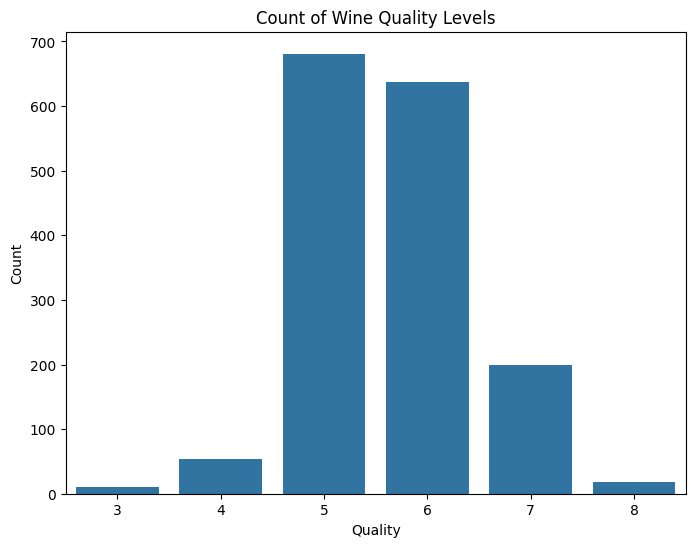

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your wine dataset (assuming it's stored in a DataFrame named 'wine_df')
# Replace this with your actual dataset loading method
# wine_df = pd.read_csv('your_wine_dataset.csv')

# Calculate the imbalance
class_counts = wine_df['quality'].value_counts()
total_samples = class_counts.sum()
class_imbalance = class_counts / total_samples * 100

print("Class Imbalance:")
print(class_imbalance)

# Plot countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=wine_df)
plt.title('Count of Wine Quality Levels')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
# Separate features and target variable
X = wine_df.drop(columns=['quality'])
y = wine_df['quality']

# Check class distribution
print("Before SMOTE:")
print(y.value_counts())

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data back to DataFrame
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['quality'] = y_resampled

# Check class distribution after SMOTE
print("After SMOTE:")
print(y_resampled.value_counts())

Before SMOTE:
quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64
After SMOTE:
quality
5    681
6    681
7    681
4    681
8    681
3    681
Name: count, dtype: int64


Class Imbalance:
quality
5    16.666667
6    16.666667
7    16.666667
4    16.666667
8    16.666667
3    16.666667
Name: count, dtype: float64


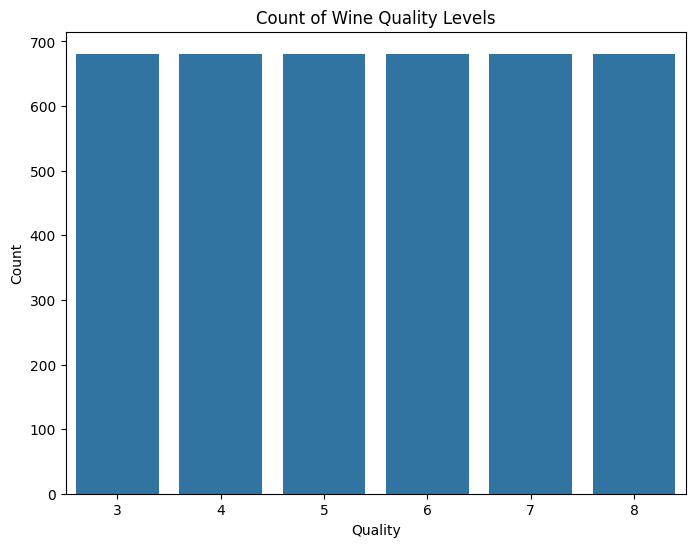

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your wine dataset (assuming it's stored in a DataFrame named 'wine_df')
# Replace this with your actual dataset loading method
# wine_df = pd.read_csv('your_wine_dataset.csv')

# Calculate the imbalance
class_counts = resampled_df['quality'].value_counts()
total_samples = class_counts.sum()
class_imbalance = class_counts / total_samples * 100

print("Class Imbalance:")
print(class_imbalance)

# Plot countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=resampled_df)
plt.title('Count of Wine Quality Levels')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()
